# Logistic Regression

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
data = pd.read_csv('processed_data.csv')

In [55]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [56]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Model Training without over/under sampling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

X = data.drop('stroke', axis=1)
y = data['stroke']

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9567430025445293
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.9572301425661914
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0


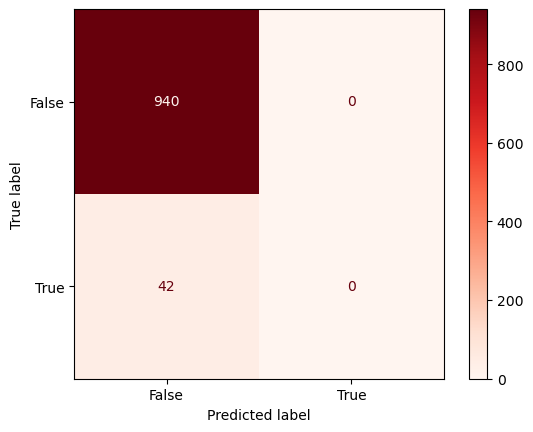

In [61]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## Model training with Oversampling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

oversampler = RandomOverSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = oversampler.fit_resample(train_feature_dummy, train_label)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.807845744680851
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.8155711550733886
recall:  0.8497340425531915
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.78125
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7911111111111111
recall:  0.8284574468085106
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.7699468085106383
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7776349614395887
recall:  0.8045212765957447
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.7918882978723404
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.8015218769816107
recall:  0.8404255319148937
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.7291242362525459
Naive Model Accura

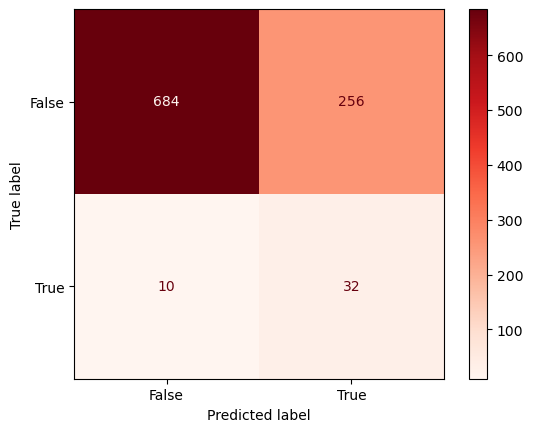

In [63]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## Undersampling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

undersampler = RandomUnderSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = undersampler.fit_resample(train_feature_dummy, train_label)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.7014925373134329
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7142857142857142
recall:  0.7575757575757576
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.746268656716418
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7384615384615384
recall:  0.7272727272727273
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.8507462686567164
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.8648648648648648
recall:  0.9411764705882353
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.7761194029850746
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7826086956521738
recall:  0.8181818181818182
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.7352342158859471
Naive Model Accurac

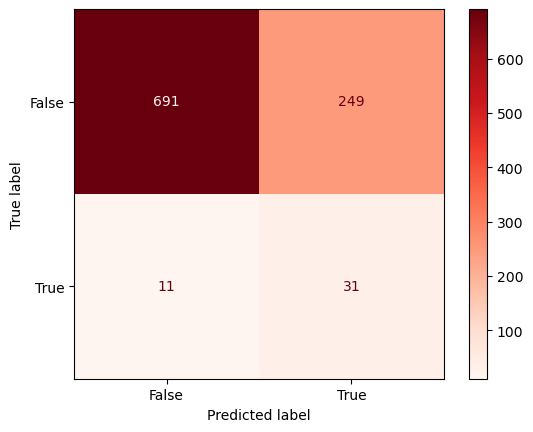

In [65]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## Class Weighted

### Without class weight

In [ ]:
# weighted logistic regression model on an imbalanced classification dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#dataset preparation
X = data.drop('stroke', axis=1)
y = data['stroke']

X_train = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


# define model
weights = {0:1.0, 1:1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y, scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Recall: %.3f' % mean(scores))

### With class weight

In [ ]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y, scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Recall: %.3f' % mean(scores))

### With Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# define grid
balance = [{0:100,1:1}, {0:25,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:25}, {0:1,1:50}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

model = LogisticRegression(solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')

grid_result = grid.fit(X_train, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))